# OKCupid

## Introduction
In recent years, there has been a massive rise in the usage of dating apps to find love. Many of these apps use sophisticated data science techniques to recommend possible matches to users and to optimize the user experience. These apps give us access to a wealth of information that we’ve never had before about how different people experience romance.

The goal of this project is to scope, prep, analyze, and create a machine learning model to solve a question.

#### Data Source
profiles.csv was provided by codecademy.com

#### Project Goals
In this project, the goal is to utilize the skills learned through Codecademy and apply machine learning techniques to a data set. The primary research question that will be answered is whether an OkCupid's user astrological sign can be predicted using other variables from their profiles. This project is important since many users find astrological signs an important part of matches, and if users don't input their sign, OkCupid would like to predict which sign they might be.

##### Data
The project has one data set provided by Codecademy called profiles.csv. In the data, each row represents an OkCupid user and the columns are the responses to their user profiles which include multi-choice and short answer questions.

##### Analysis
This solution will use descriptive statistics and data visualization to find key figures in understanding the distribution, count, and relationship between variables. Since the goal of the project to make predictions on the user's astrological signs, classification algorithms from the supervised learning family of machine learning models will be implemented.

##### Evaluation
The project will conclude with the evaluation of the machine learning model selected with a validation data set. The output of the predictions can be checked through a confusion matrix, and metrics such as accuracy, precision, recall, F1 and Kappa scores.

## Import Python Modules
First import the modules being used for this project:

In [93]:
# General Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('max_colwidth', None)

%matplotlib inline
plt.rcParams['figure.figsize']=[10, 6]
plt.rcParams['font.size']=10

import warnings
warnings.filterwarnings('ignore')

## Loading the Data
To analyze the user profiles from OkCupid, pandas will be used to load the dataset into a DataFrame so that it can be explored and visualized with Python.

Here profiles.csv is loaded into a DataFrame called profiles. The DataFrame is then briefly examined using .head() to check the contents.

In [94]:
profiles = pd.read_csv('profiles.csv', encoding='utf-8')
profiles.head(1)

,age,body_type,diet,drinks,drugs,education,essay0,essay1,essay2,essay3,essay4,essay5,essay6,essay7,essay8,essay9,ethnicity,height,income,job,last_online,location,offspring,orientation,pets,religion,sex,sign,smokes,speaks,status
0,22,a little extra,strictly anything,socially,never,working on college/university,"about me:<br />\n<br />\ni would love to think that i was some some kind of intellectual:\neither the dumbest smart guy, or the smartest dumb guy. can't say i\ncan tell the difference. i love to talk about ideas and concepts. i\nforge odd metaphors instead of reciting cliches. like the\nsimularities between a friend of mine's house and an underwater\nsalt mine. my favorite word is salt by the way (weird choice i\nknow). to me most things in life are better as metaphors. i seek to\nmake myself a little better everyday, in some productively lazy\nway. got tired of tying my shoes. considered hiring a five year\nold, but would probably have to tie both of our shoes... decided to\nonly wear leather shoes dress shoes.<br />\n<br />\nabout you:<br />\n<br />\nyou love to have really serious, really deep conversations about\nreally silly stuff. you have to be willing to snap me out of a\nlight hearted rant with a kiss. you don't have to be funny, but you\nhave to be able to make me laugh. you should be able to bend spoons\nwith your mind, and telepathically make me smile while i am still\nat work. you should love life, and be cool with just letting the\nwind blow. extra points for reading all this and guessing my\nfavorite video game (no hints given yet). and lastly you have a\ngood attention span.","currently working as an international agent for a freight\nforwarding company. import, export, domestic you know the\nworks.<br />\nonline classes and trying to better myself in my free time. perhaps\na hours worth of a good book or a video game on a lazy sunday.","making people laugh.<br />\nranting about a good salting.<br />\nfinding simplicity in complexity, and complexity in simplicity.","the way i look. i am a six foot half asian, half caucasian mutt. it\nmakes it tough not to notice me, and for me to blend in.","books:<br />\nabsurdistan, the republic, of mice and men (only book that made me\nwant to cry), catcher in the rye, the prince.<br />\n<br />\nmovies:<br />\ngladiator, operation valkyrie, the producers, down periscope.<br />\n<br />\nshows:<br />\nthe borgia, arrested development, game of thrones, monty\npython<br />\n<br />\nmusic:<br />\naesop rock, hail mary mallon, george thorogood and the delaware\ndestroyers, felt<br />\n<br />\nfood:<br />\ni'm down for anything.",food.<br />\nwater.<br />\ncell phone.<br />\nshelter.,duality and humorous things,trying to find someone to hang out with. i am down for anything\nexcept a club.,i am new to california and looking for someone to wisper my secrets\nto.,you want to be swept off your feet!<br />\nyou are tired of the norm.<br />\nyou want to catch a coffee or a bite.<br />\nor if you want to talk philosophy.,"asian, white",75.0,-1,transportation,2012-06-28-20-30,"south san francisco, california","doesn&rsquo;t have kids, but might want them",straight,likes dogs and likes cats,agnosticism and very serious about it,m,gemini,sometimes,english,single


In [95]:
profiles.shape

(59946, 31)

In [96]:
profiles.last_online.head()

0    2012-06-28-20-30
1    2012-06-29-21-41
2    2012-06-27-09-10
3    2012-06-28-14-22
4    2012-06-27-21-26
Name: last_online, dtype: object

In [97]:
profiles.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59946 entries, 0 to 59945
Data columns (total 31 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   age          59946 non-null  int64  
 1   body_type    54650 non-null  object 
 2   diet         35551 non-null  object 
 3   drinks       56961 non-null  object 
 4   drugs        45866 non-null  object 
 5   education    53318 non-null  object 
 6   essay0       54458 non-null  object 
 7   essay1       52374 non-null  object 
 8   essay2       50308 non-null  object 
 9   essay3       48470 non-null  object 
 10  essay4       49409 non-null  object 
 11  essay5       49096 non-null  object 
 12  essay6       46175 non-null  object 
 13  essay7       47495 non-null  object 
 14  essay8       40721 non-null  object 
 15  essay9       47343 non-null  object 
 16  ethnicity    54266 non-null  object 
 17  height       59943 non-null  float64
 18  income       59946 non-null  int64  
 19  job 

#### Data Characteristics
profiles has 59,946 rows and 31 columns, this is a good sign since there seems to be enough data for machine learning.

The columns in the dataset include:
- <b>age</b>: continuous variable of age of user
- <b>body_type</b>: categorical variable of body type of user
- <b>diet</b>: categorical variable of dietary information
- <b>drinks</b>: categorical variable of alcohol consumption
- <b>drugs</b>: categorical variable of drug usage
- <b>education</b>: categorical variable of educational attainment
- <b>ethnicity</b>: categorical variable of ethnic backgrounds
- <b>height</b>: continuous variable of height of user
- <b>income</b>: continuous variable of income of user
- <b>job</b>: categorical variable of employment description
- <b>offspring</b>: categorical variable of children status
- <b>orientation</b>: categorical variable of sexual orientation
- <b>pets</b>: categorical variable of pet preferences
- <b>religion</b>: categorical variable of religious background
- <b>sex</b>: categorical variable of gender
- <b>sign</b>: categorical variable of astrological symbol
- <b>smokes</b>: categorical variable of smoking consumption
- <b>speaks</b>: categorical variable of language spoken
- <b>status</b>: categorical variable of relationship status
- <b>last_online</b>: date variable of last login
- <b>location</b>: categorical variable of user locations

And a set of open short-answer responses to :
- <b>essay0</b>: My self summary
- <b>essay1</b>: What I’m doing with my life
- <b>essay2</b>: I’m really good at
- <b>essay3</b>: The first thing people usually notice about me
- <b>essay4</b>: Favorite books, movies, show, music, and food
- <b>essay5</b>: The six things I could never do without
- <b>essay6</b>: I spend a lot of time thinking about
- <b>essay7</b>: On a typical Friday night I am
- <b>essay8</b>: The most private thing I am willing to admit
- <b>essay9</b>: You should message me if…

## Explore the Data
First to be explored is the number of unique signs, and the values. It seems that there are 48, but there should only be 12 signs. Upon closer inspection, there seems to be qualifiers attached with the signs.

In [98]:
# create dataframe with numeric feature
num_features = profiles.select_dtypes('number')

num_features.describe()

,age,height,income
count,59946.000000,59943.000000,59946.000000
mean,32.340290,68.295281,20033.222534
std,9.452779,3.994803,97346.192104
min,18.000000,1.000000,-1.000000
25%,26.000000,66.000000,-1.000000
50%,30.000000,68.000000,-1.000000
75%,37.000000,71.000000,-1.000000
max,110.000000,95.000000,1000000.000000


OKCupid members were between 18-110 years old. While half of them around 30 years old. The height (inches) were between 1-95 inc, half of them around 68 inc. The range of incomes were 1-1000000 dolar. There was some anomalies as height should not be as low as 1 inch and income should not be negative values.

In [99]:
# create dataframe with object feature
obj_features = profiles.select_dtypes('object')
obj_features.describe()

,body_type,diet,drinks,drugs,education,essay0,essay1,essay2,essay3,essay4,essay5,essay6,essay7,essay8,essay9,ethnicity,job,last_online,location,offspring,orientation,pets,religion,sex,sign,smokes,speaks,status
count,54650,35551,56961,45866,53318,54458,52374,50308,48470,49409,49096,46175,47495,40721,47343,54266,51748,59946,59946,24385,59946,40025,39720,59946,48890,54434,59896,59946
unique,12,18,6,3,32,54350,51516,48635,43533,49260,48963,43603,45554,39324,45443,217,21,30123,199,15,3,15,45,2,48,5,7647,5
top,average,mostly anything,socially,never,graduated from college/university,.,enjoying it.,listening,my smile,ask me,my family,my future,out with friends,ask me,you want to.,white,other,2012-06-29-22-56,"san francisco, california",doesn&rsquo;t have kids,straight,likes dogs and likes cats,agnosticism,m,gemini and it&rsquo;s fun to think about,no,english,single
freq,14652,16585,41780,37724,23959,12,61,82,529,16,6,161,89,45,199,32831,7589,24,31064,7560,51606,14814,2724,35829,1782,43896,21828,55697


<b>Explored the number of unique signs, and the values. It seems that there are 48, but there should only be 12 signs. Upon closer inspection, there seems to be qualifiers attached with the signs.</b>

In [100]:
print('number of categories : ', profiles.sign.nunique())
print(profiles['sign'].unique())

number of categories :  48
['gemini' 'cancer' 'pisces but it doesn&rsquo;t matter' 'pisces'
 'aquarius' 'taurus' 'virgo' 'sagittarius'
 'gemini but it doesn&rsquo;t matter' 'cancer but it doesn&rsquo;t matter'
 'leo but it doesn&rsquo;t matter' nan
 'aquarius but it doesn&rsquo;t matter'
 'aries and it&rsquo;s fun to think about'
 'libra but it doesn&rsquo;t matter'
 'pisces and it&rsquo;s fun to think about' 'libra'
 'taurus but it doesn&rsquo;t matter'
 'sagittarius but it doesn&rsquo;t matter' 'scorpio and it matters a lot'
 'gemini and it&rsquo;s fun to think about'
 'leo and it&rsquo;s fun to think about'
 'cancer and it&rsquo;s fun to think about'
 'libra and it&rsquo;s fun to think about'
 'aquarius and it&rsquo;s fun to think about'
 'virgo but it doesn&rsquo;t matter'
 'scorpio and it&rsquo;s fun to think about'
 'capricorn but it doesn&rsquo;t matter' 'scorpio'
 'capricorn and it&rsquo;s fun to think about' 'leo'
 'aries but it doesn&rsquo;t matter' 'aries'
 'scorpio but it d

### Clean Data
It is important that we clean the labels since this is what will be predicted and 48 predictions would be quite difficult. By taking the first word of the column, the signs can be saved without the qualifiers. The qualifiers could be used for another problem down the line.

In [101]:
profiles['signsCleaned'] = profiles.sign.str.split().str.get(0)
print('number of categories', profiles['signsCleaned'].nunique())
print(profiles['signsCleaned'].unique())

profiles['signsCleaned'].value_counts()

number of categories 12
['gemini' 'cancer' 'pisces' 'aquarius' 'taurus' 'virgo' 'sagittarius'
 'leo' nan 'aries' 'libra' 'scorpio' 'capricorn']


leo            4374
gemini         4310
libra          4207
cancer         4206
virgo          4141
taurus         4140
scorpio        4134
aries          3989
pisces         3946
sagittarius    3942
aquarius       3928
capricorn      3573
Name: signsCleaned, dtype: int64

### Continous Variable

<b>age</b>

Plot shows the distribution of age in the group.It seems that most users are in their late 20s and early 30s.

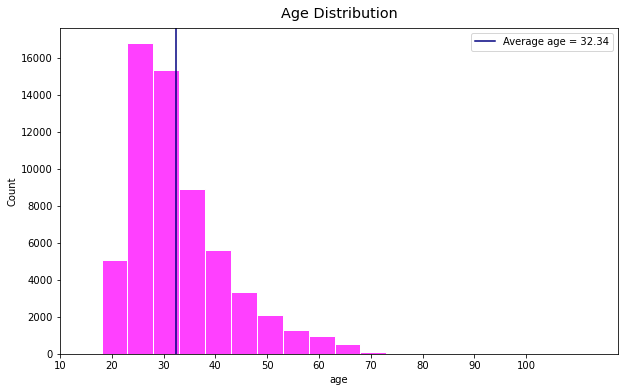

In [102]:
# mean of ages
avg_age = np.mean(profiles.age)

sns.histplot(data=profiles, x='age', color='fuchsia', binwidth=5, edgecolor='white')
plt.axvline(avg_age, color='navy', label='Average age = ' + str(round(avg_age,2)))
plt.title('Age Distribution', fontsize='x-large', pad=10)
plt.xticks(range(10, 110, 10))
plt.legend()

Here is the same chart age but broken down by gender. It seems that there are proportionally similar break down of gender by age, but slightly fewer female overall.

Text(0.5, 1.0, 'Age Distribution by Gender')

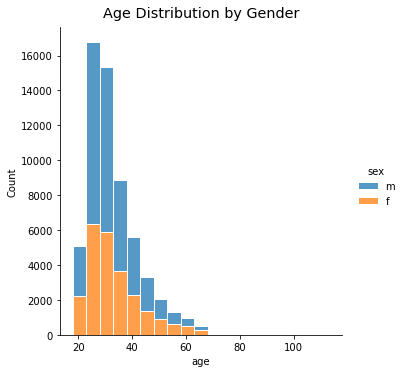

In [103]:
sns.displot(data=profiles, x='age', hue='sex', kind='hist', binwidth=5, edgecolor='white', multiple='stack')
plt.title('Age Distribution by Gender', fontsize='x-large', pad=10)

<b>height</b>

The next plot show the height variable, most people look like they are between 5 feet tall and 6.5 feet tall

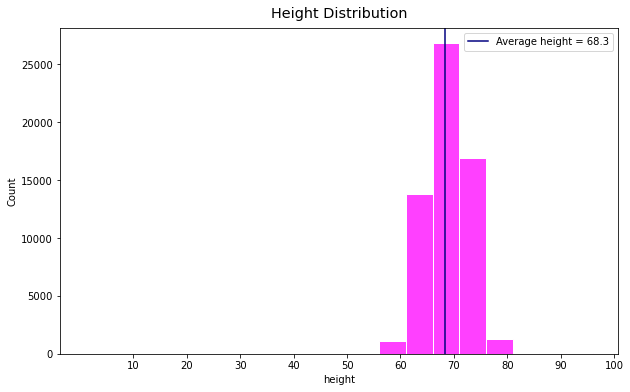

In [104]:
# mean of height
avg_height = np.mean(profiles.height)

sns.histplot(data=profiles, x='height', color='fuchsia', binwidth=5, edgecolor='white')
plt.axvline(avg_height, color='navy', label='Average height = ' + str(round(avg_height,2)))
plt.title('Height Distribution', fontsize='x-large', pad=10)
plt.xticks(range(10, 110, 10))
plt.legend(loc='best')

Here is the same chart height but broken down by gender. It seems obvius, but females tend to be shorter than males and looks to have normal distribution

Text(0.5, 1.0, 'Height Distribution by Gender')

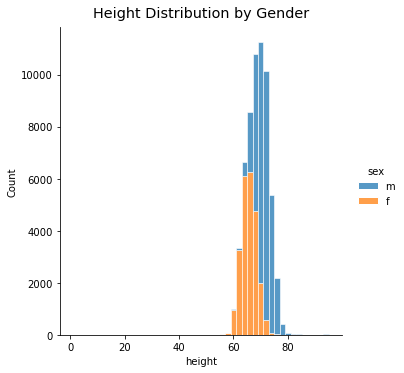

In [105]:
sns.displot(data=profiles, x='height', hue='sex', kind='hist', binwidth=2, edgecolor='white', multiple='stack')
plt.title('Height Distribution by Gender', fontsize='x-large', pad=10)

<b>income</b>

Here is the data of income, it seems that the majority participants do not include their income figures.

Text(0.5, 1.0, 'Income Distribution by Gender')

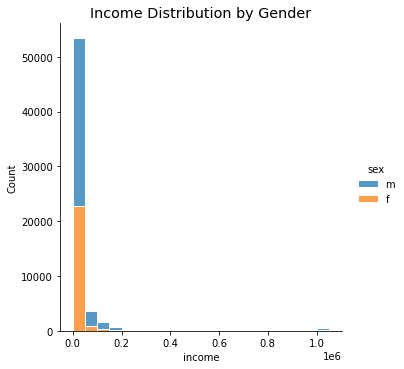

In [106]:
sns.displot(data=profiles, x='income', hue='sex', kind='hist', binwidth=50000, edgecolor='white', multiple='stack');
plt.title('Income Distribution by Gender', fontsize='x-large')

### Discrete Variables 

<b>Sex</b>

Previously it was identified that there are more males in the data, and it seems that there are ~35.000 men and ~25.000 women

<AxesSubplot:xlabel='sex', ylabel='count'>

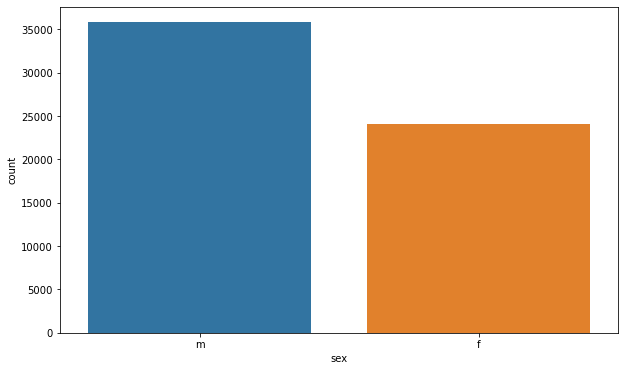

In [107]:
sns.countplot(data=profiles, x='sex')

<b>Body Type</b>

The next chart shows the body type variable, and it seems most users will describe themself as average, fit and athletic

<AxesSubplot:xlabel='count', ylabel='body_type'>

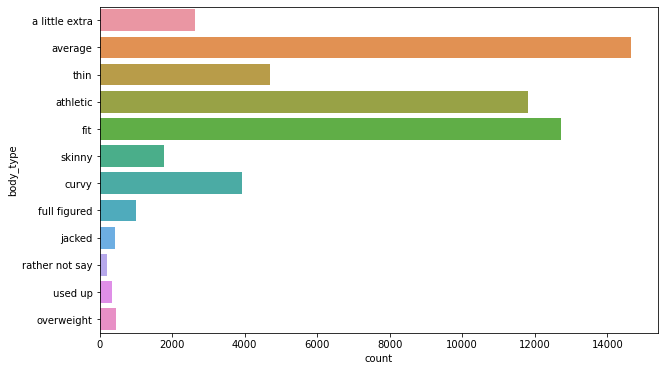

In [108]:
sns.countplot(data=profiles, y='body_type')

The next chart shows the break down of body type by gender and it seems that some of the body type descriptions are highly gendered. For example 'curvy' and 'full figure' are highly female descriptions, while males use 'a little extra' and 'overwight' 

<AxesSubplot:xlabel='count', ylabel='body_type'>

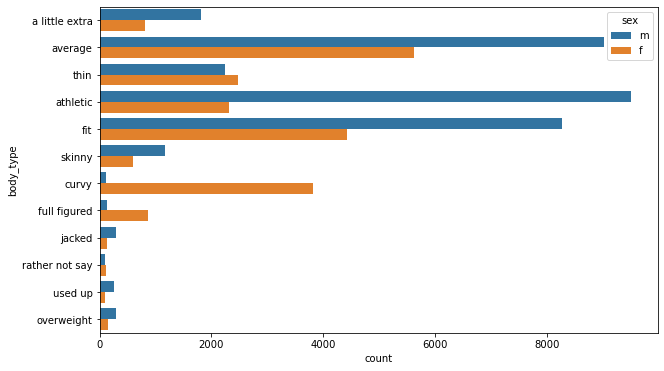

In [109]:
sns.countplot(data=profiles, y='body_type', hue='sex')

<b>Diet</b>

Here is a chart of dietary information for users. Most users eat "mostly anything", followed by "anything", and "strictly anything", being open-minded seems to be a popular signal to potential partners.

<AxesSubplot:xlabel='count', ylabel='diet'>

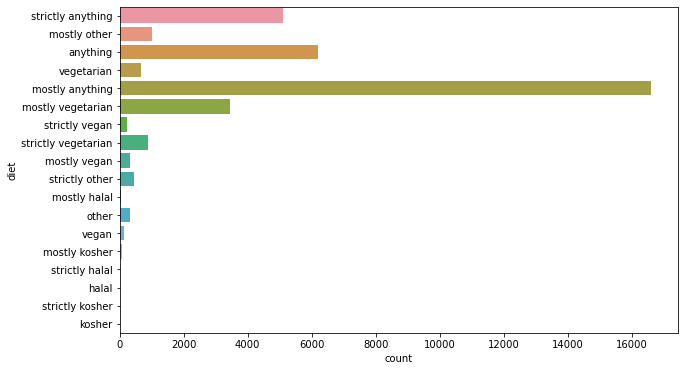

In [110]:
sns.countplot(data=profiles, y='diet')

<b>Drinks</b>

The next plot shows that the majority of the users drink "social", the "rarely" and "often" 

<AxesSubplot:xlabel='count', ylabel='drinks'>

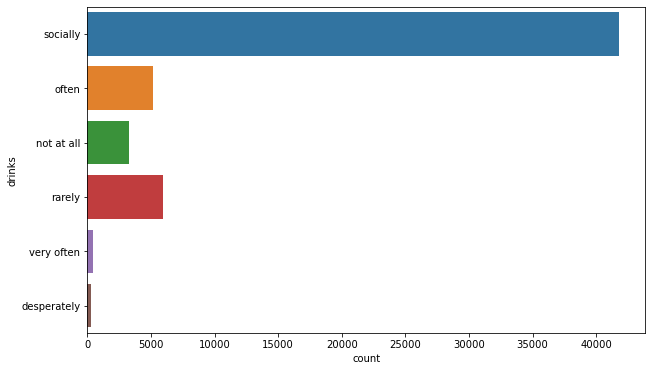

In [111]:
sns.countplot(data=profiles, y='drinks')

<b>Drugs</b>

The vast majority users "never" use drugs.

<AxesSubplot:xlabel='drugs', ylabel='count'>

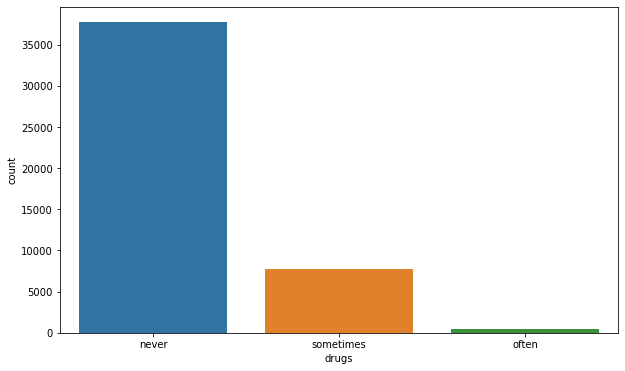

In [112]:
sns.countplot(data=profiles, x='drugs')

<b>Education</b>

Below we can see that the majority of users are graduated from college/university followed by master programs and those working on college/university. Interestingly space camp related options are fairly a popular option.

<AxesSubplot:xlabel='count', ylabel='education'>

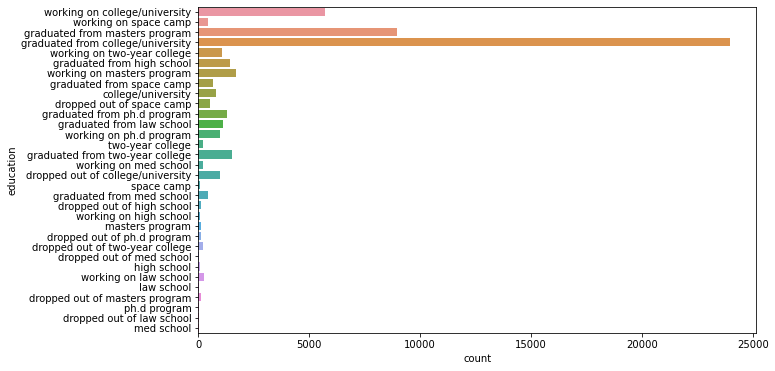

In [113]:
sns.countplot(data=profiles, y='education')

<b>Ethnicity</b>

In [114]:
# count  a number of each unique ethnicity
ethnicity_counts = profiles.groupby('ethnicity').status.count()

# sort values by the number of count
ethnicity_counts= ethnicity_counts.sort_values(ascending=False).reset_index(name='counts')
ethnicity_counts

,ethnicity,counts
0,white,32831
1,asian,6134
2,hispanic / latin,2823
3,black,2008
4,other,1706
5,"hispanic / latin, white",1301
6,indian,1077
7,"asian, white",811
8,"white, other",641
9,pacific islander,432


<b>Job</b>

Most users don't fit categories provided, but there are a fair share of students, artists, tech and business folks.

<AxesSubplot:xlabel='count', ylabel='job'>

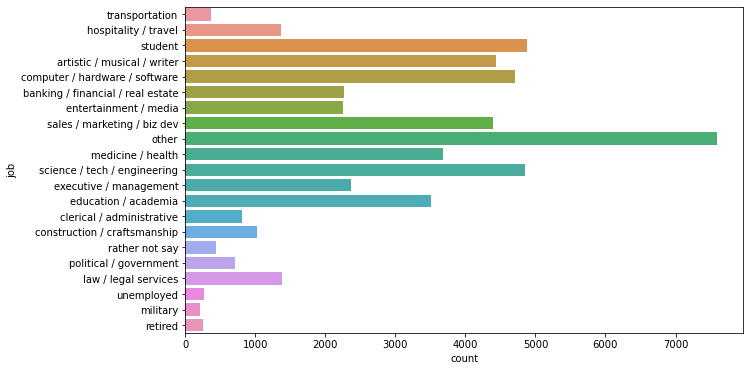

In [115]:
sns.countplot(data=profiles, y='job')

<b>Offspring</b>

The data suggested that most users don't have kids.

<AxesSubplot:xlabel='count', ylabel='offspring'>

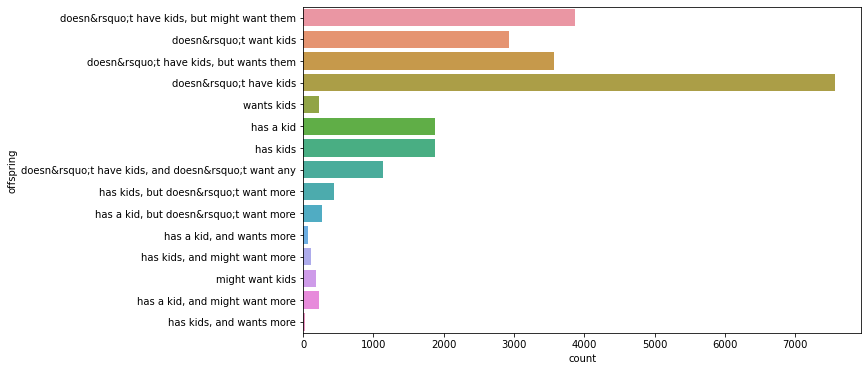

In [116]:
sns.countplot(data=profiles, y='offspring')

<b>Orientation</b>

The majority users are straight

<AxesSubplot:xlabel='orientation', ylabel='count'>

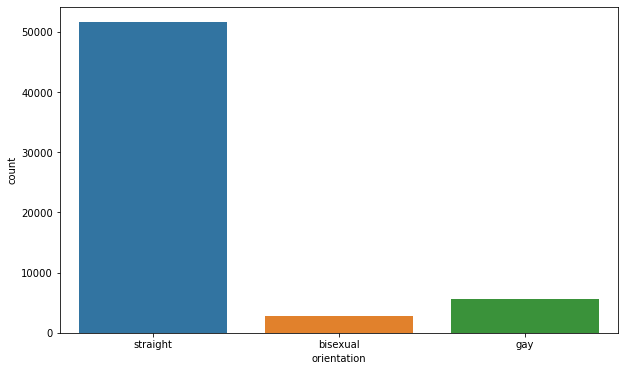

In [117]:
sns.countplot(data=profiles, x='orientation')

Interesting the majority bisexsual are female.

<AxesSubplot:xlabel='orientation', ylabel='count'>

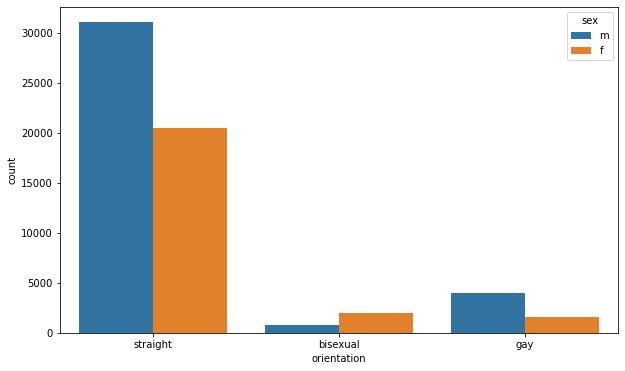

In [118]:
sns.countplot(data=profiles, x='orientation', hue='sex')

<b>Pets</b>

The cart shows most users like or has dogs.

<AxesSubplot:xlabel='count', ylabel='pets'>

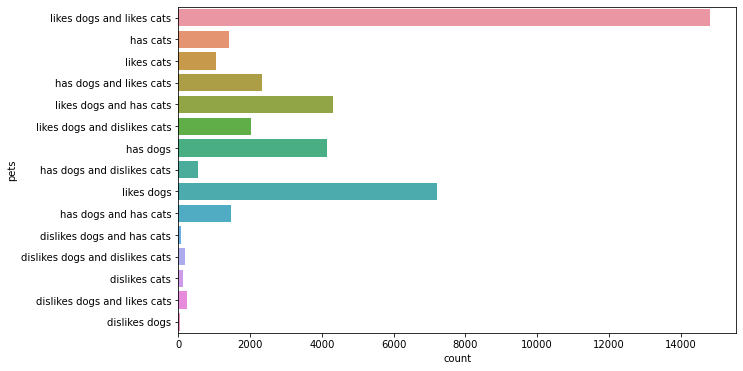

In [119]:
sns.countplot(data=profiles, y='pets')

<b>Religion</b>

Religion was similar to sign where there are a lot of qualifiers.

<AxesSubplot:xlabel='count', ylabel='religion'>

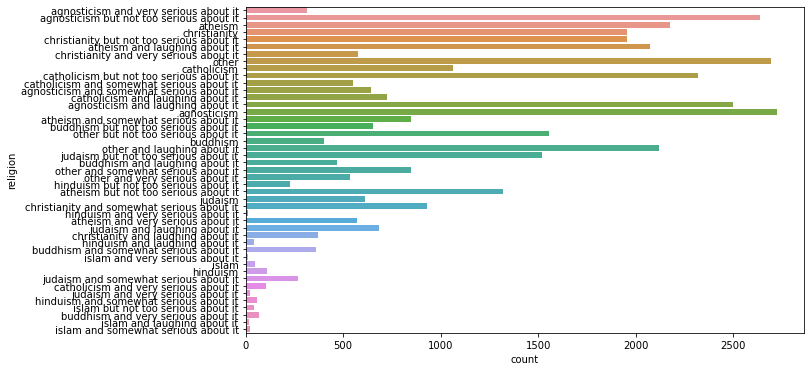

In [120]:
sns.countplot(data=profiles, y='religion')

Religion was cleaned to take the first word and distile down to 9 groups.The majority was not very religious identifying as agnostic, other and atheism. 

<AxesSubplot:xlabel='count', ylabel='religionCleaned'>

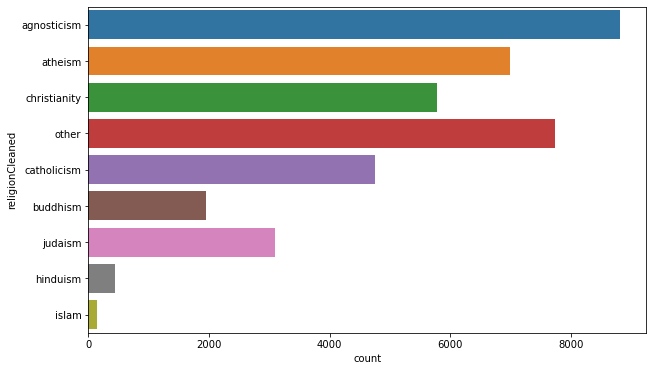

In [121]:
profiles['religionCleaned'] = profiles.religion.str.split().str.get(0)
sns.countplot(data=profiles, y='religionCleaned')

<b>Sign</b>

Here are the astrological signs of the users. There are mainly evenly distributed with Capricons being the rarest and Leos being the common.  

<AxesSubplot:xlabel='count', ylabel='signsCleaned'>

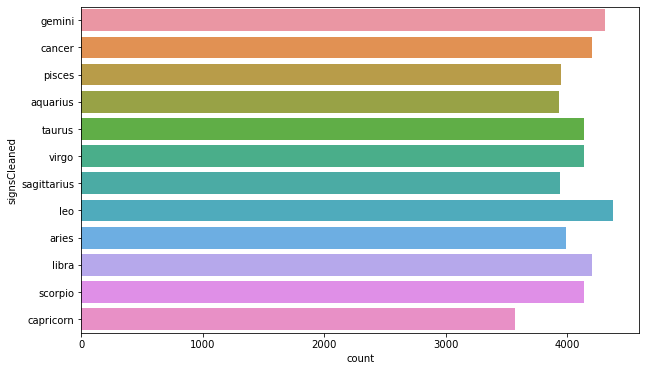

In [122]:
sns.countplot(data=profiles, y='signsCleaned')

<b>Smoking</b>

Similarly to drugs the majority choose "no" for smoking

<AxesSubplot:xlabel='count', ylabel='smokes'>

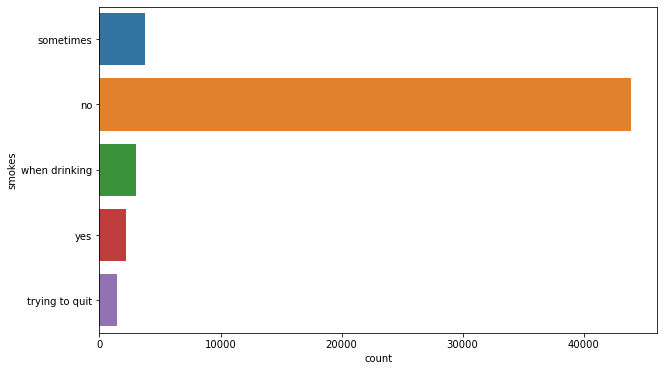

In [123]:
sns.countplot(data=profiles, y='smokes')

<b>Speak</b>

In [124]:
print(profiles.speaks.nunique())
print(profiles.speaks.unique())

7647
['english' 'english (fluently), spanish (poorly), french (poorly)'
 'english, french, c++' ...
 'english (fluently), hindi (poorly), french (poorly), tamil (okay), spanish (poorly)'
 'english (fluently), french (poorly), japanese (poorly), latin (poorly)'
 'english (fluently), french, farsi']


<b>Status</b>

The relationship status for a dating website is fairly predictable. One would assume that most people are single and available which is reflected in the data. 

<AxesSubplot:xlabel='count', ylabel='status'>

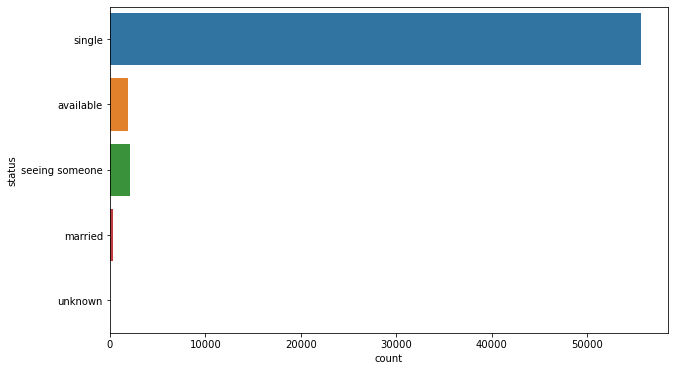

In [125]:
sns.countplot(data=profiles, y='status')

## Data Preparation

### Missing Data

Missing data is often not handle by machine learning algorithms well and have to checked so they may need to be imputed or removed. it seems that many of the columns do have missing values.

<AxesSubplot:>

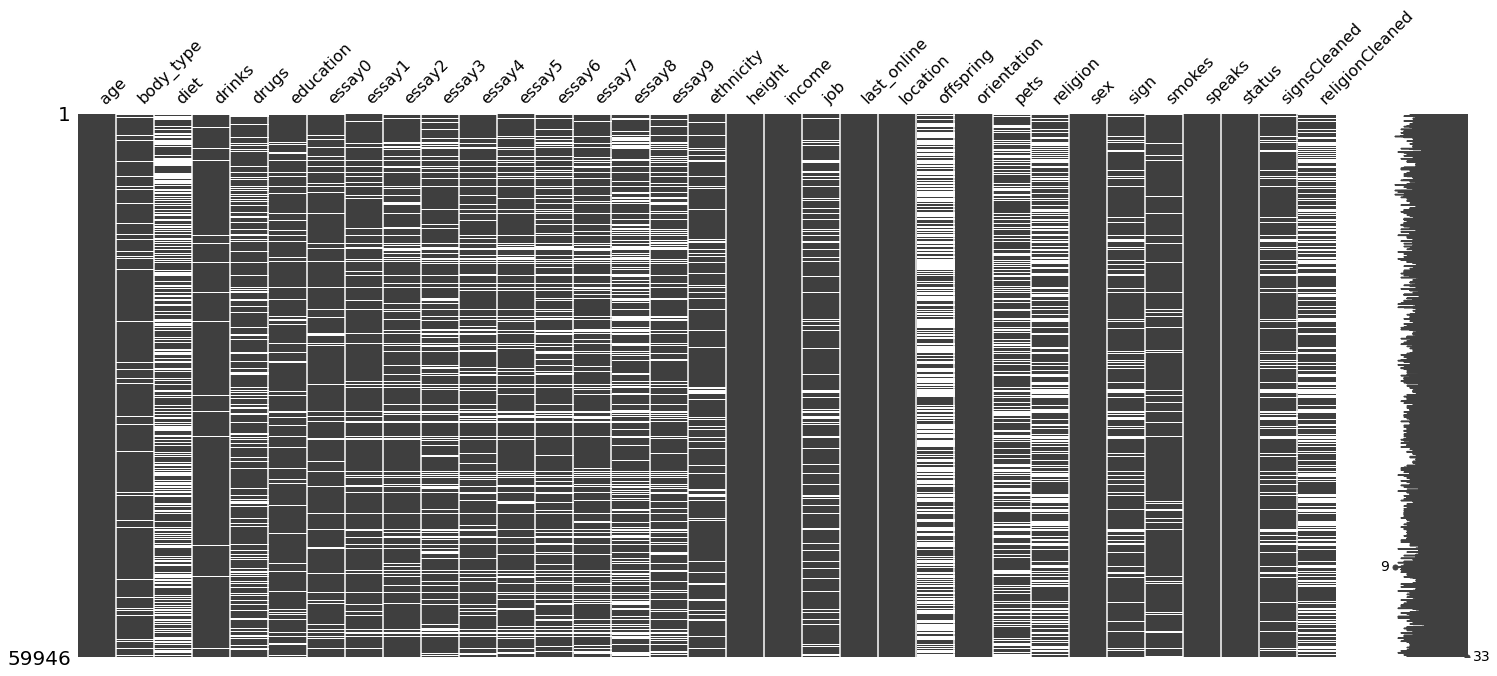

In [126]:
msno.matrix(profiles)

In [127]:
# check the number of missing value in each column
profiles.isna().sum()

age                    0
body_type           5296
diet               24395
drinks              2985
drugs              14080
education           6628
essay0              5488
essay1              7572
essay2              9638
essay3             11476
essay4             10537
essay5             10850
essay6             13771
essay7             12451
essay8             19225
essay9             12603
ethnicity           5680
height                 3
income                 0
job                 8198
last_online            0
location               0
offspring          35561
orientation            0
pets               19921
religion           20226
sex                    0
sign               11056
smokes              5512
speaks                50
status                 0
signsCleaned       11056
religionCleaned    20226
dtype: int64

## Machine Learning Models Training

In order to create a model that predict a zodiac sign for a user, only some features are used to create model. As it is a multi-classification, four machine learning models were chosen.

K Nearest Neighbors
Random Forest
Support Vector Machine
Multinomial Naive Bayes The first three models have the same data preparation using age and categorical columns. Meanwhile, Multinomial Naive Bayes model uses essay columns (data about users' interests in text form).

<b>Preprocessing</b>

Preparing the data for modeling is important since it can speed up the process and produce better models. As the adage goes, "garbage in garbage out" so we want to make sure the data we are inputing into our modeling step is good enough to share with others.

The data for the model is going to to be a subset of the variables. The variables were selected because they might be a good predictor for astrological signs, where some of the variables that were not selected such as <b>age</b> is probably not a good indicator.

here na values are dropped to create a fully complete dataset.

In [128]:
cols = ['body_type', 'diet', 'orientation', 'pets', 'religionCleaned', 'sex', 'job', 'signsCleaned']
df = profiles[cols].dropna()
df.shape

(16453, 8)

<b>Dummy Variables</b>

In this next step, dummy variables are created to deal with the categorical variables. Dummy variables will turn the categories per variable into its own binary identifier. The data now has 81 columns to predict sign.

In [129]:
for col in cols[:-1]:
    df = pd.get_dummies(df, columns=[col], prefix=[col])

In [130]:
df.head()

,signsCleaned,body_type_a little extra,body_type_athletic,body_type_average,body_type_curvy,body_type_fit,body_type_full figured,body_type_jacked,body_type_overweight,body_type_rather not say,body_type_skinny,body_type_thin,body_type_used up,diet_anything,diet_halal,diet_kosher,diet_mostly anything,diet_mostly halal,diet_mostly kosher,diet_mostly other,diet_mostly vegan,diet_mostly vegetarian,diet_other,diet_strictly anything,diet_strictly halal,diet_strictly kosher,diet_strictly other,diet_strictly vegan,diet_strictly vegetarian,diet_vegan,diet_vegetarian,orientation_bisexual,orientation_gay,orientation_straight,pets_dislikes cats,pets_dislikes dogs,pets_dislikes dogs and dislikes cats,pets_dislikes dogs and has cats,pets_dislikes dogs and likes cats,pets_has cats,pets_has dogs,pets_has dogs and dislikes cats,pets_has dogs and has cats,pets_has dogs and likes cats,pets_likes cats,pets_likes dogs,pets_likes dogs and dislikes cats,pets_likes dogs and has cats,pets_likes dogs and likes cats,religionCleaned_agnosticism,religionCleaned_atheism,religionCleaned_buddhism,religionCleaned_catholicism,religionCleaned_christianity,religionCleaned_hinduism,religionCleaned_islam,religionCleaned_judaism,religionCleaned_other,sex_f,sex_m,job_artistic / musical / writer,job_banking / financial / real estate,job_clerical / administrative,job_computer / hardware / software,job_construction / craftsmanship,job_education / academia,job_entertainment / media,job_executive / management,job_hospitality / travel,job_law / legal services,job_medicine / health,job_military,job_other,job_political / government,job_rather not say,job_retired,job_sales / marketing / biz dev,job_science / tech / engineering,job_student,job_transportation,job_unemployed
0,gemini,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
1,cancer,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
5,taurus,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
7,sagittarius,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
9,cancer,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0


In [138]:
df.shape

(16453, 81)

<b>Label Imbalance</b>

An imbalance in the prediction label needs to be checked. This is important since it's a multi-class problem where two or more outcomes can be had. An imbalance in a response variable is bad since it means that some labels only occur a few times. This is an issue for machine learning algorithms if there are not enough data to train with which will give bad predictions.

In the given dataset, we observe that the counts of all the zodiac signs are more or less equal (i.e., without large deviations). Hence, we do not have to worry about imbalances and trying to address this problem.

In [131]:
df['signsCleaned'].value_counts()

leo            1516
gemini         1496
cancer         1457
virgo          1451
taurus         1390
scorpio        1356
libra          1354
pisces         1334
aries          1328
sagittarius    1312
aquarius       1262
capricorn      1197
Name: signsCleaned, dtype: int64

### Splitting the Data

Next the data needs to be split into train and validation sets. In this split 25% of data is reserved for the final validation, while 75% is kept for training the model.

In [166]:
col_length = len(df.columns)

# Y is target column, X has the rest
x = df.iloc[:, 1:col_length]
y = df.iloc[:, 0:1]

# Validation chunk size
val_size = 0.25

# Split the data into chunks
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=val_size, random_state=0)

# turn in to 1d arrays
y_train = y_train.to_numpy().ravel()
y_test = y_test.to_numpy().ravel()
y_test

array(['cancer', 'aries', 'pisces', ..., 'pisces', 'leo', 'gemini'],
      dtype=object)

In [167]:
# length of signs
col_length

81

In [177]:
len(x_train)

12339

In [178]:
len(y_train)

12339

### Prediction

#### Model Building
now it's time to create some models, here is a list of [Multi class models](https://scikit-learn.org/stable/modules/multiclass.html) available in skicit learn. For this project three common algorithms will be used to make predictions.

Below the rspective moduls, for Logistic Regression, Decision Trees and KNN are loaded.

In [170]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

#### Evaluation Metrics
In the models, there will be several values that can be evaluated below is a quick diagram:
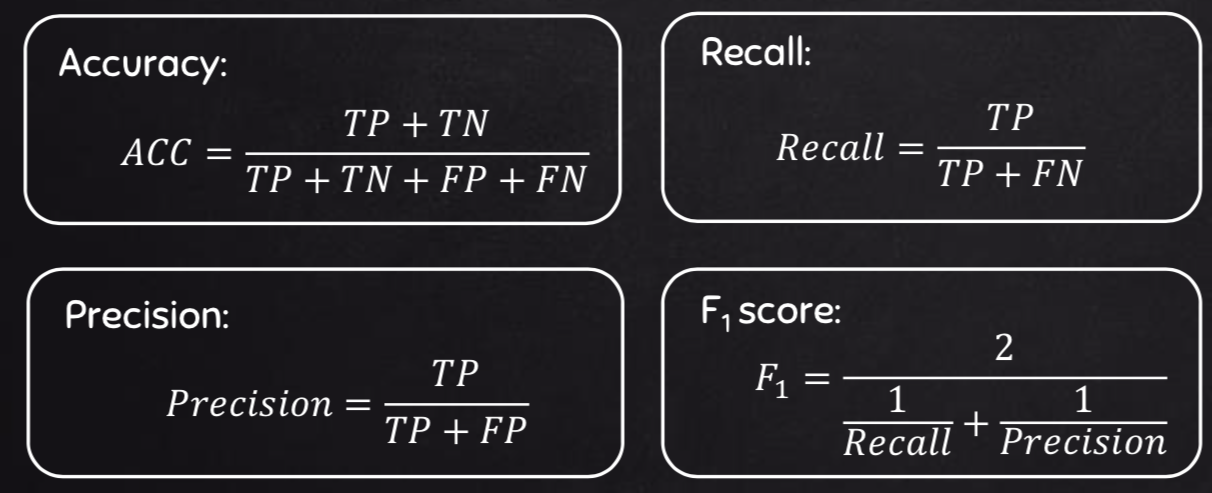

here is a quick description of the metrics:

- Accuracy: is the correct values divided by total values
- Precision: is the True Positives divided by the sum of True Positives and False Negatives. So precision is the values of the - true positives divided by the actual positive values.
- Recall: is the True Positives divided by the sum of True Positives and False Positives. So recall is the values of the true - - positives divided by the positive guesses.
- F1-score: is a blended score of precision and recall which balances both values.
- Macro Avg: is the unweighted mean value of precision and recall.
- Weighted Avg: is the weighted mean value of precision and recall by the support values for each class.
- Support: is the number of observations in class to predict.

#### Logistic Regression
The first model is using logistic regression with multi_class="multinomial" argument. Using lr_model predictions are created from the training dataset which is used to figure out how well the model perform.

In [171]:
lr_model = LogisticRegression(multi_class='multinomial').fit(x_train, y_train)
lr_predictions = lr_model.predict(x_train)

The final accuracy of the logistic regression model is 12% which is terrible considering a random guess should result in being correct ~8% of the time(1/12)

In [172]:
from sklearn.metrics import classification_report

print(classification_report(y_train, lr_predictions))

              precision    recall  f1-score   support

    aquarius       0.13      0.07      0.09       968
       aries       0.12      0.10      0.11       983
      cancer       0.13      0.24      0.17      1129
   capricorn       0.14      0.05      0.07       882
      gemini       0.12      0.15      0.13      1130
         leo       0.12      0.19      0.15      1121
       libra       0.11      0.08      0.09      1028
      pisces       0.11      0.09      0.10       997
 sagittarius       0.13      0.09      0.11       965
     scorpio       0.14      0.05      0.08      1001
      taurus       0.13      0.12      0.12      1045
       virgo       0.12      0.21      0.15      1090

    accuracy                           0.12     12339
   macro avg       0.12      0.12      0.11     12339
weighted avg       0.12      0.12      0.12     12339



#### K Nearest Neighbours
The next models is the KNeighborsClassifier which will take 20 of it's neighbors to predict the signs. The default value for n_neighbors is 5 which was kept. This number can be tuned later on if needed. This model had a 33% accuracy which is a good sign.

In [173]:
knn_model = KNeighborsClassifier(n_neighbors=5).fit(x_train, y_train)
knn_predictions = knn_model.predict(x_train)

In [174]:
print(classification_report(y_train, knn_predictions))

              precision    recall  f1-score   support

    aquarius       0.26      0.65      0.37       968
       aries       0.27      0.50      0.35       983
      cancer       0.27      0.41      0.33      1129
   capricorn       0.34      0.32      0.33       882
      gemini       0.37      0.34      0.35      1130
         leo       0.38      0.29      0.33      1121
       libra       0.39      0.26      0.31      1028
      pisces       0.40      0.25      0.31       997
 sagittarius       0.42      0.22      0.29       965
     scorpio       0.41      0.23      0.30      1001
      taurus       0.42      0.25      0.31      1045
       virgo       0.42      0.24      0.31      1090

    accuracy                           0.33     12339
   macro avg       0.36      0.33      0.32     12339
weighted avg       0.36      0.33      0.32     12339



#### Decision Trees
The last model is the decision tree, the default max_depth is none which means that it will "If None, then nodes are expanded until all leaves are pure or until all leaves contain less than min_samples_split samples.". The results are very promising because it has a 78% accuracy with this model.

In [175]:
cart_model = DecisionTreeClassifier().fit(x_train, y_train)
cart_predictions = cart_model.predict(x_train)

In [176]:
print(classification_report(y_train, cart_predictions))

              precision    recall  f1-score   support

    aquarius       0.67      0.94      0.78       968
       aries       0.66      0.88      0.75       983
      cancer       0.71      0.86      0.77      1129
   capricorn       0.74      0.84      0.79       882
      gemini       0.78      0.79      0.79      1130
         leo       0.80      0.80      0.80      1121
       libra       0.79      0.76      0.78      1028
      pisces       0.82      0.74      0.78       997
 sagittarius       0.91      0.70      0.79       965
     scorpio       0.89      0.71      0.79      1001
      taurus       0.93      0.70      0.80      1045
       virgo       0.94      0.67      0.78      1090

    accuracy                           0.78     12339
   macro avg       0.80      0.78      0.78     12339
weighted avg       0.80      0.78      0.78     12339



Below is confussion matrix of result with the true value values on the y axis and predicted values along the x axis. Since the diagonals are lighter in color and have higher numbers, the accuracy is going to be high since those are the True Positives. 

In [180]:
from sklearn.metrics import confusion_matrix

cart_cm = confusion_matrix(y_train, cart_predictions)
cart_labels = cart_model.classes_

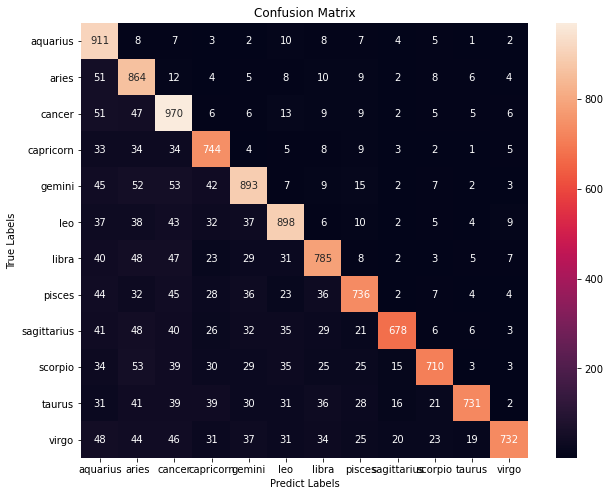

In [183]:
plt.figure(figsize=(10,8))

ax = plt.subplot()
sns.heatmap(cart_cm, annot=True, ax=ax, fmt='d');

# labels, title and ticks
ax.set_xlabel('Predict Labels');
ax.set_ylabel('True Labels');
ax.set_title('Confusion Matrix');
ax.yaxis.set_tick_params(rotation=360);
ax.xaxis.set_tick_params(rotation=360);

ax.xaxis.set_ticklabels(cart_labels);
ax.yaxis.set_ticklabels(cart_labels);

Going back to the model, a quick analysis will show that this tree model has depth of 49 branches, which will probably not generalize to another dataset. In this case this model has been <b>"overfit"</b> for this data.

In [184]:
cart_model.get_depth()

49

To make a point, a five fold cross validation is created with same data. The results are worse than the KNN and about the Logistic Regression algorithms. the baseline was ~9%.

In [188]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

kfold = KFold(n_splits=5, shuffle=True, random_state=0)
results = cross_val_score(cart_model, x_train, y_train, cv=kfold, scoring="accuracy")

print(results)
print("Baseline : \n mean : %.2f%% \n std : (%.2f%%)" % (results.mean()*100, results.std()*100))

[0.0834684  0.0923825  0.08833063 0.09643436 0.08998784]
Baseline : 
 mean : 9.01% 
 std : (0.43%)


The decision tree model will be made it again, but with a max_depth of 20 to stop the algorithm from reaching the stopping point. The new accuracy rate of ~41% is worse than the first iteration, but slightly better than KNN model.

In [191]:
cart_model20 = DecisionTreeClassifier(max_depth=20).fit(x_train, y_train)
cart_predictions20 = cart_model20.predict(x_train)

In [192]:
print(classification_report(y_train, cart_predictions20))

              precision    recall  f1-score   support

    aquarius       0.57      0.40      0.47       968
       aries       0.43      0.43      0.43       983
      cancer       0.37      0.50      0.42      1129
   capricorn       0.53      0.42      0.47       882
      gemini       0.40      0.44      0.42      1130
         leo       0.36      0.48      0.41      1121
       libra       0.28      0.41      0.34      1028
      pisces       0.61      0.34      0.44       997
 sagittarius       0.64      0.33      0.44       965
     scorpio       0.37      0.39      0.38      1001
      taurus       0.53      0.38      0.44      1045
       virgo       0.32      0.40      0.36      1090

    accuracy                           0.41     12339
   macro avg       0.45      0.41      0.42     12339
weighted avg       0.45      0.41      0.42     12339



if we check again with cross validation, the new model is still averaging ~8% which is not very good.

In [194]:
results20 = cross_val_score(cart_model20, x_train, y_train, cv=kfold, scoring="accuracy")

print(results20)
print("Baseline : \n mean : %.2f%% \n std : (%.2f%%)" % (results20.mean()*100, results20.std()*100))

[0.07617504 0.08468395 0.08427877 0.08427877 0.08998784]
Baseline : 
 mean : 8.39% 
 std : (0.44%)


### Final Model
So it seems KNN that the knn_model might be the best model for OKCupid to use when users don't have their listed on their user profile. By using the hold out of validation, we get ~8% which is not very good. 

In [196]:
knn_predictionsVal = knn_model.predict(x_test)
print(classification_report(y_test, knn_predictionsVal))

              precision    recall  f1-score   support

    aquarius       0.07      0.22      0.11       294
       aries       0.09      0.15      0.11       345
      cancer       0.08      0.13      0.10       328
   capricorn       0.09      0.08      0.09       315
      gemini       0.08      0.08      0.08       366
         leo       0.08      0.06      0.07       395
       libra       0.10      0.07      0.08       326
      pisces       0.09      0.06      0.07       337
 sagittarius       0.09      0.04      0.05       347
     scorpio       0.10      0.05      0.07       355
      taurus       0.11      0.07      0.08       345
       virgo       0.10      0.06      0.07       361

    accuracy                           0.09      4114
   macro avg       0.09      0.09      0.08      4114
weighted avg       0.09      0.09      0.08      4114



In the confusion matrix, it becomes clear that Cancer, Gemini, Leo and Virgo was predicted most often.  but was not super accurate since the vertical color band represents even distributed guesses mostly wrong and some correct.

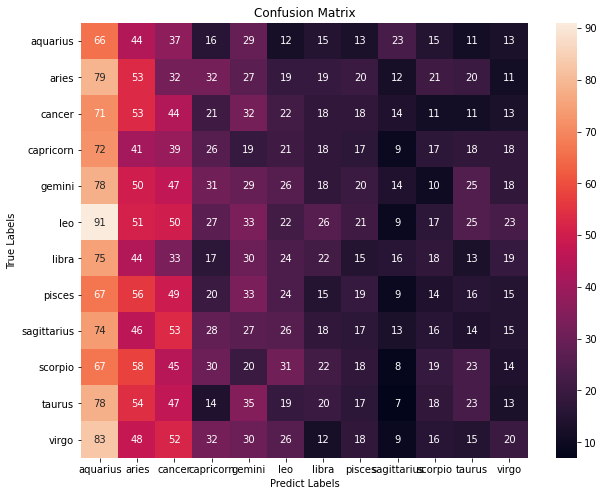

In [198]:
final_cm = confusion_matrix(y_test, knn_predictionsVal)
knn_labels = knn_model.classes_

plt.figure(figsize=(10,8))

ax = plt.subplot()
sns.heatmap(final_cm, annot=True, ax=ax, fmt='d');

# labels, title and ticks
ax.set_xlabel('Predict Labels');
ax.set_ylabel('True Labels');
ax.set_title('Confusion Matrix');
ax.yaxis.set_tick_params(rotation=360);
ax.xaxis.set_tick_params(rotation=360);

ax.xaxis.set_ticklabels(cart_labels);
ax.yaxis.set_ticklabels(cart_labels);

## Conclusion

### General Comments
In this project machine learning was used to predict the astrological signs of OkCupid users. This is an important feature since many people believe in astrology and matches between compatible star signs. If users don't input their signs, an algorithmic solution could have generated a sign to impute missing data when making matches.

Alas, the final selected algorithm did no better than basic guessing.

### Next Steps
Next steps will be to seriously consider whether it is possible to predict user's astrological signs period, or if there is a way to do with more data. Another possibility is to add additional models or tune the hyper parameters of the used models to see if any more predictive power could be squeezed out of the algorithms.